In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import platform
import random

In [2]:
# Verify which machine this program is running on

DATADIR = ""

# Checking which computer is running this program. (Either running on macOS or Ubuntu)
if("Linux" == platform.system()):
        DATADIR = "/home/ragib/Documents/dogs-vs-cats"
        print("Running on Linux and the data path is : " + DATADIR)
else:
        DATADIR = "/Users/ragibahashan/Computer Vision/dogs-vs-cats"
        print("Running on macOS and the data path is : " + DATADIR)

Running on Linux and the data path is : /home/ragib/Documents/dogs-vs-cats


There are 25000 training examples (images) of cats and dogs.


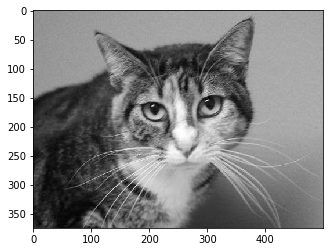

In [3]:
training_path = DATADIR + "/train"

list_all_training_images = os.listdir(training_path)

# Shuffle list
random.seed(30)
random.shuffle(list_all_training_images)
print("There are", len(list_all_training_images), "training examples (images) of cats and dogs.")


# First test. Output an image from the list using cv2.
image = list_all_training_images[0]
image_test = cv2.imread(os.path.join(training_path, image), cv2.IMREAD_GRAYSCALE)
plt.imshow(image_test, cmap = "gray")
plt.show()

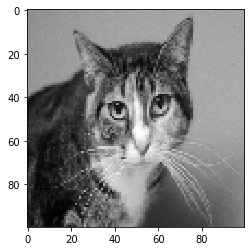

In [4]:
# Need to rescale it to a square & smaller resolution format in order to feed it into the neural net.
resolution = 100

test_image = cv2.resize(image_test, (resolution,resolution))
plt.imshow(test_image, cmap = "gray")
plt.show()

# Now that we've correctly imported our cats and dogs images, it's time to get create our training data. 

In [5]:
training_data = []
CAT = 0
DOG = 1

cats = 0
dogs = 0

for image in list_all_training_images:
    if(image.find("cat") == CAT):
        current_image = cv2.imread(os.path.join(training_path, image), cv2.IMREAD_GRAYSCALE)
        current_image = cv2.resize(current_image, (resolution,resolution))
        training_data.append([current_image,CAT])
        cats += 1
    else:
        current_image = cv2.imread(os.path.join(training_path, image), cv2.IMREAD_GRAYSCALE)
        current_image = cv2.resize(current_image, (resolution,resolution))
        training_data.append([current_image,DOG])
        dogs += 1
        
print("The number of images of cats is equal to the number of images of dogs in our training data: ", cats == dogs)
#print(image.find("cat") == CAT)

The number of images of cats is equal to the number of images of dogs in our training data:  True


CAT


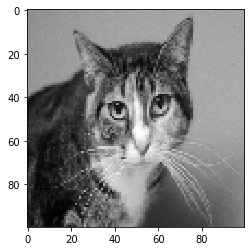

DOG


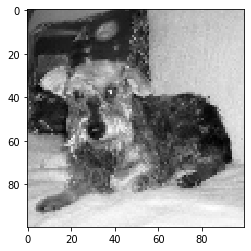

DOG


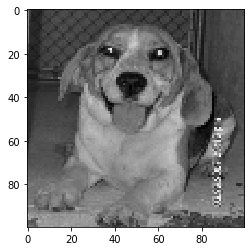

DOG


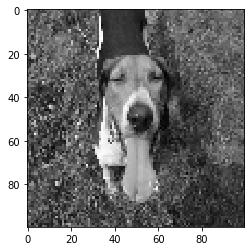

DOG


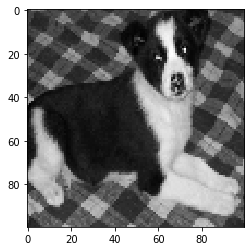

CAT


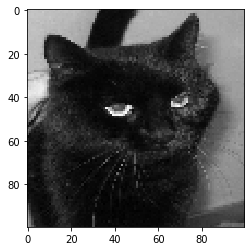

DOG


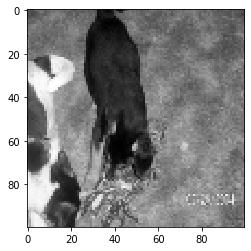

CAT


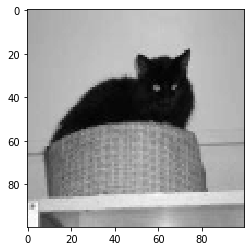

CAT


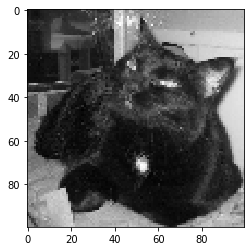

CAT


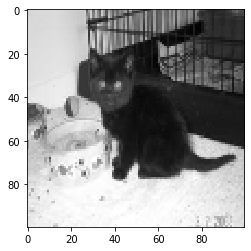

In [6]:
# Verify our list.
for i in range(10):
    if(training_data[i][1] == CAT):
        plt.imshow(training_data[i][0], cmap = "gray")
        print("CAT")
    else:
        plt.imshow(training_data[i][0], cmap = "gray")
        print("DOG")
    plt.show()

In [7]:
X = []
y = []

for features, label in training_data:
        X.append(features)
        y.append(label)

This is a cat: False


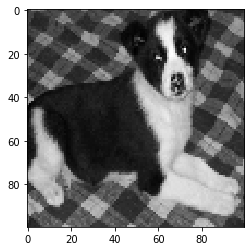

In [8]:
print("This is a cat:" ,y[4] == CAT)
plt.imshow(X[4], cmap = "gray")
plt.show()

In [9]:
print(X[0].shape[0])

100


In [10]:
X = np.array(X)

In [11]:
X = X.reshape(-1, X.shape[0], X.shape[1], 1)

In [13]:
print(X[0].shape)

(25000, 100, 1)
